<a href="https://colab.research.google.com/github/jayaraksha/ML-EX3_Jayaraksha_24BAD044/blob/main/scenario1_EX3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Jayaraksha 24BAD044")

Jayaraksha 24BAD044


In [ ]:
from google.colab import files
files.upload()


Saving StudentsPerformance.csv to StudentsPerformance.csv


{'StudentsPerformance.csv': b'"gender","race/ethnicity","parental level of education","lunch","test preparation course","math score","reading score","writing score"\n"female","group B","bachelor\'s degree","standard","none","72","72","74"\n"female","group C","some college","standard","completed","69","90","88"\n"female","group B","master\'s degree","standard","none","90","95","93"\n"male","group A","associate\'s degree","free/reduced","none","47","57","44"\n"male","group C","some college","standard","none","76","78","75"\n"female","group B","associate\'s degree","standard","none","71","83","78"\n"female","group B","some college","standard","completed","88","95","92"\n"male","group B","some college","free/reduced","none","40","43","39"\n"male","group D","high school","free/reduced","completed","64","64","67"\n"female","group B","high school","free/reduced","none","38","60","50"\n"male","group C","associate\'s degree","standard","none","58","54","52"\n"male","group D","associate\'s degre

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df["final_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)


In [ ]:
import numpy as np

np.random.seed(42)

df["study_hours"] = np.random.normal(3, 1, len(df)).clip(1, 8)
df["attendance"] = np.random.normal(85, 5, len(df)).clip(60, 100)
df["sleep_hours"] = np.random.normal(7, 1, len(df)).clip(4, 9)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["parental_education"] = le.fit_transform(df["parental level of education"])
df["test_prep"] = le.fit_transform(df["test preparation course"])


In [ ]:
X = df[
    [
        "study_hours",
        "attendance",
        "sleep_hours",
        "parental_education",
        "test_prep"
    ]
]

y = df["final_score"]


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MSE: 207.97981246010642
RMSE: 14.42150520785214
R² Score: 0.029793611503287742


In [ ]:
coefficients = pd.DataFrame({
    "Feature": [
        "Study Hours",
        "Attendance",
        "Sleep Hours",
        "Parental Education",
        "Test Preparation"
    ],
    "Coefficient": model.coef_
})

coefficients


,Feature,Coefficient
0,Study Hours,0.250848
1,Attendance,0.248902
2,Sleep Hours,-0.392489
3,Parental Education,-0.993705
4,Test Preparation,-3.837595


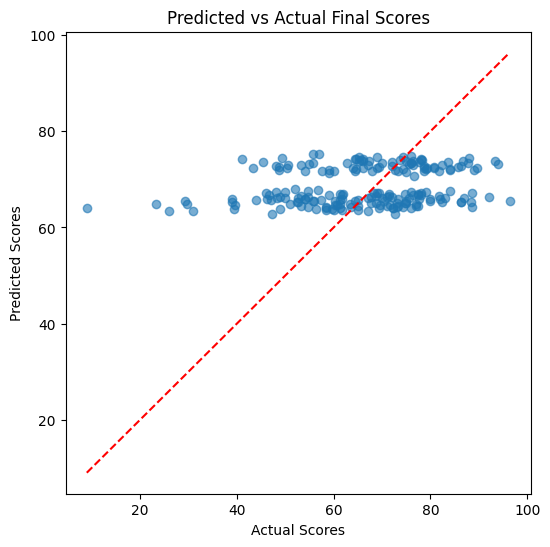

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Predicted vs Actual Final Scores")
plt.show()


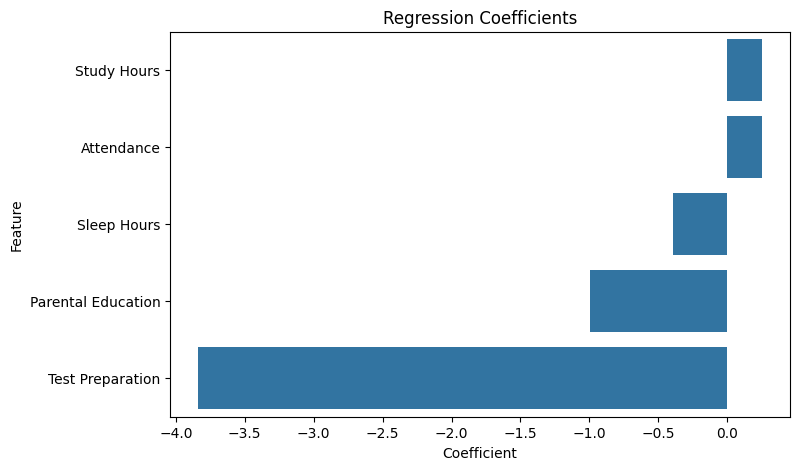

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x="Coefficient", y="Feature", data=coefficients)
plt.title("Regression Coefficients")
plt.show()


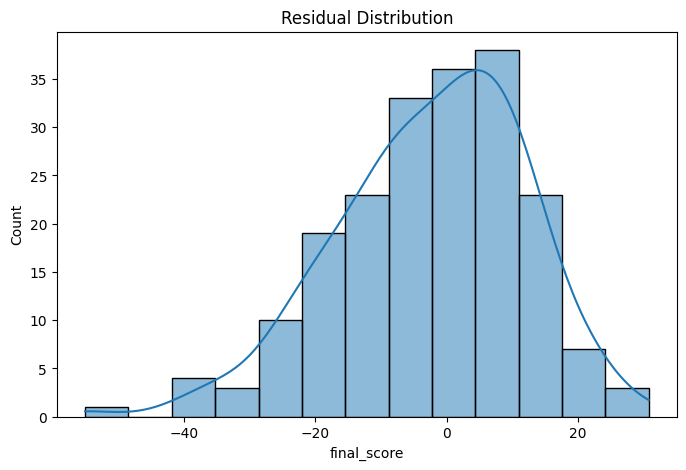

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()
